In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import os

import pandas as pd


from altaipony.flarelc import FlareLightCurve
from funcs.helper import read_custom_aperture_lc
from funcs.multiperiod import show_flare, find_period, remove_sinusoidal, fetch_lightcurve

/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/importlib/_bootstrap_external.py:426: ImportWarning: Not importing directory /home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/mpl_toolkits: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)
/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/bokeh/resources.py:107: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/bokeh/_sri.json' mode='r' encoding='UTF-8'>
  _SRI_HASHES = json.load(open(join(ROOT_DIR, "_sri.json")))
/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
CWD = "/".join(os.getcwd().split("/")[:-2])
lcs = pd.read_csv(f"{CWD}/data/summary/lcs.csv")
lcs

,ID,QCS,typ,cadence_min,mission,prefix,origin,h_mission,SpT,view_start,...,J,R,Gaia_G,vsini_kms,e_vsini_kms,Prot_d,sini,Ref,identifier,Rstar
0,100004076,14,slc,1,kep,KIC,generic,Kepler,L1,1356.50,...,13.078,NaN,17.8356,11.2,2.2,0.370150,>.59,Gizis+13,WISEP J190648.47+401106.8,0.107
1,212035340,18,llc,30,ktwo,EPIC,generic,K2,M8,3437.00,...,15.900,NaN,19.5667,NaN,NaN,0.193000,NaN,Paudel+19,MASS J08371832+2050349,0.111
2,237880881,1,slc,2,tess,TIC,generic,TESS,M5,1331.00,...,11.530,NaN,14.9796,14.4,2.6,0.351250,NaN,Kraus+14,2MASS J01180670-6258591,0.199
3,44984200,10,slc,2,tess,TIC,custom,TESS,M6,1587.25,...,10.309,15.08,14.4115,NaN,NaN,0.113000,NaN,this work,SCR J0838-5855,NaN
4,277539431,12,slc,2,tess,TIC,custom,TESS,M7,1641.00,...,10.630,NaN,14.7381,NaN,NaN,0.190000,NaN,this work,WISEA J105515.71-735611.3,NaN
5,300741820,8,slc,2,tess,TIC,generic,TESS,M6,1522.00,...,11.959,NaN,15.3277,NaN,NaN,0.132000,NaN,Zhan+19,UCAC4 116-015389,NaN
6,230120143,16,slc,2,tess,TIC,generic,TESS,M7,1741.00,...,9.854,NaN,13.5570,10.8,0.7,0.378325,0.6844128,Kesseli+2018,NaN,NaN


### Just show the flares and save the figures

In [3]:
for i, row in lcs.iterrows():
    if row.ID == 230120143:
        show_flare(row, save=True)

FileNotFoundError: [Errno 2] No such file or directory: '/home/ekaterina/Documents/001_science/MalachiteMountains/data/lcs/230120143_16_tess_slc_generic.fits'

### Find the modulation period and plot periodograms

11% (1987/17755) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
11% (1987/17755) of the cadences will be ignored due to the quality mask (quality_bitmask=175).


100004076
212035340
237880881
44984200
277539431
300741820
TIC 300741820 modulation period:  3.167960564278575 h
0.1319983568449406 d
230120143


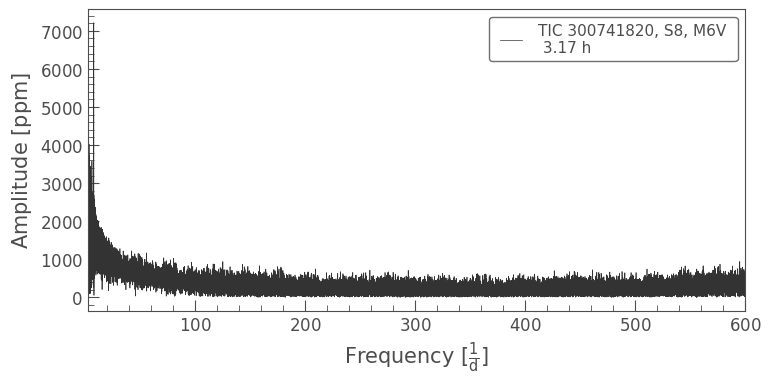

In [19]:
for i, row in lcs.iterrows():
    print(row.ID)
    if row.ID == 300741820:
        #row.origin = "custom"
        period, mfp = find_period(row, save=True, maxfreq=600, custom=True)
        print(period.to("d"))

In [21]:
period.to("d")
24*6

144

In [ ]:

#for i, row in lcs.iterrows():
flc = fetch_lightcurve(lcs.loc[3])
pg = flc.remove_nans().to_periodogram(freq_unit=1/u.d,
                                              maximum_frequency=10,
                                              minimum_frequency=2)

folded = flc.fold(pg.period_at_max_power.to("d").value)
folded.scatter();
plt.ylim(.95,1.05);
t, flux, model, period = remove_sinusoidal(lcs.loc[3], plot=False, save=False)
newlc = FlareLightCurve(time=t, flux=flux, targetid=flc.targetid)
folded = flc.fold(pg.period_at_max_power.to("d").value/2)
folded.scatter();
plt.ylim(.95,1.05);
plt.legend()

## Fit a sinusoidal modulation and plot the residual

In [ ]:
for i, row in lcs.iterrows():
    t, s_flux, model, period = remove_sinusoidal(row, save=True)